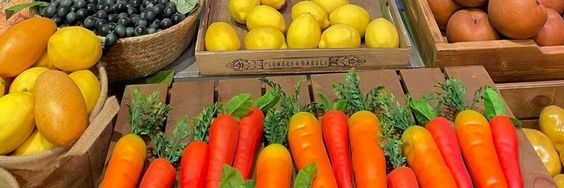

#                 Predicting Food Security in ASEAN countries

## Business Goals :

### 1. To improve Food Security Index
### 2. To ensure the food security is always sustainable and affordable

## Problem Statement

### 1. The multiple external factors to measure food insecurity such as climate change, natural disasters, political instability, logistical distruption , economical instability and others can be cumbersome and challenging to predict the food insecurity in a real time at national level or community level.

### 2. National survey has to be conducted in order to assess food insecurity which incurs high cost and prolong time.


## Initial questions :
### 1. How has the metrics of food insecurity (malnutrition) changed over time for alll ASEAN countries ?
### 2. What is the relationship between prevalence of malnutrition with other food insecurity factors such as food price inflation and population ?

### 3. What is the main contributor of food insecurity ?

## Data Mining Goal :

### 1. To predict food insecurity by using closely linked indicators such as production yield , consumer price index, population growth and many more


## Overview and Motivation

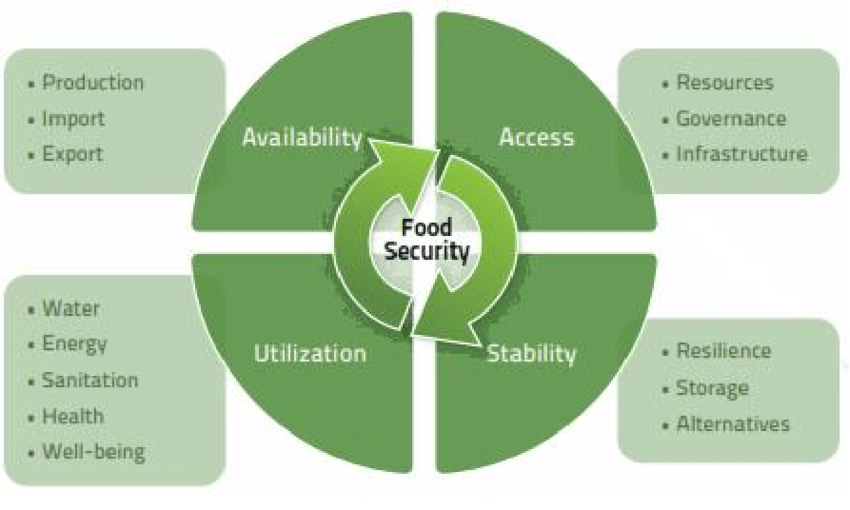



- The nutrional status of the population such as malnutrion is one of the indicators used to determine the level of food insecurity.

- The main factors of food insecurity are economic downturn, lack of food accessibility and growing population

- The ASEAN Food Security Reserve Agreement was established in 1999 to ensure the food security needs of each members is asssured.

- One of its provision was an establishment of  a food information and early warning system to mitigate potential food crisis. 

- This project aims to predict the Food Security level in each ASEAN country to assist the organization to provide proper allocation of resource to the member of ASEAN.


## Related work
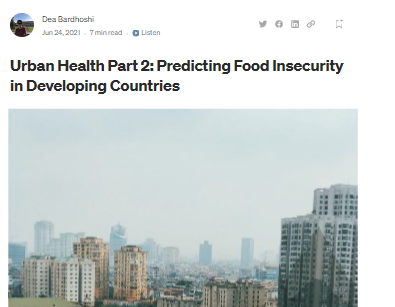
[Reference link](https://towardsdatascience.com/urban-health-part-2-predicting-food-insecurity-in-developing-countries-8cf39e15ecec)

## Data Cleaning / Preprocessing

In [1]:
# Original raw dataset

import pandas as pd

df = pd.read_csv(r'C:\Users\user\Documents\University Of Malaya Master in DS\SEM 1\WQD7003 DATA ANALYTICS\Assignments\FAOSTAT_data food security.csv')

df

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,26,Brunei Darussalam,6121,Value,21010,Average dietary energy supply adequacy (percen...,20002002,2000-2002,%,123.0,F,FAO estimate,NaN
1,FS,Suite of Food Security Indicators,26,Brunei Darussalam,6121,Value,21010,Average dietary energy supply adequacy (percen...,20012003,2001-2003,%,125.0,F,FAO estimate,NaN
2,FS,Suite of Food Security Indicators,26,Brunei Darussalam,6121,Value,21010,Average dietary energy supply adequacy (percen...,20022004,2002-2004,%,127.0,F,FAO estimate,NaN
3,FS,Suite of Food Security Indicators,26,Brunei Darussalam,6121,Value,21010,Average dietary energy supply adequacy (percen...,20032005,2003-2005,%,127.0,F,FAO estimate,NaN
4,FS,Suite of Food Security Indicators,26,Brunei Darussalam,6121,Value,21010,Average dietary energy supply adequacy (percen...,20042006,2004-2006,%,127.0,F,FAO estimate,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,FS,Suite of Food Security Indicators,26,Brunei Darussalam,6128,Value,21031,Per capita food supply variability (kcal/cap/day),2015,2015,kcal/capita/day,26.0,F,FAO estimate,NaN
177,FS,Suite of Food Security Indicators,26,Brunei Darussalam,6128,Value,21031,Per capita food supply variability (kcal/cap/day),2016,2016,kcal/capita/day,9.0,F,FAO estimate,NaN
178,FS,Suite of Food Security Indicators,26,Brunei Darussalam,6128,Value,21031,Per capita food supply variability (kcal/cap/day),2017,2017,kcal/capita/day,6.0,F,FAO estimate,NaN
179,FS,Suite of Food Security Indicators,26,Brunei Darussalam,6128,Value,21031,Per capita food supply variability (kcal/cap/day),2018,2018,kcal/capita/day,11.0,F,FAO estimate,NaN


In [2]:
uniques = df.Item.unique()[0:]

In [3]:
list_features = []
for item in df.Item.unique()[0:]:
    list_features.append(item)

In [4]:
list_features

['Average dietary energy supply adequacy (percent) (3-year average)',
 'Average value of food production (constant 2004-2006 I$/cap) (3-year average)',
 'Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)',
 'Average protein supply (g/cap/day) (3-year average)',
 'Average supply of protein of animal origin (g/cap/day) (3-year average)',
 'Cereal import dependency ratio (percent) (3-year average)',
 'Percent of arable land equipped for irrigation (percent) (3-year average)',
 'Value of food imports in total merchandise exports (percent) (3-year average)',
 'Political stability and absence of violence/terrorism (index)',
 'Per capita food production variability (constant 2004-2006 thousand int$ per capita)',
 'Per capita food supply variability (kcal/cap/day)']

In [5]:
values_for_feature = {}
for l in list_features:
    vals = []
    filtered = df[df.Item == l]
    if list(filtered.Value) != []:
        for f in list(filtered.Value):
            vals.append(f)
        if len(vals) != 20:
            for i in range(20-len(vals)):
                vals.append('N/A')
            print(len(vals))
        values_for_feature[l] = vals 

20
20
20
20
20
20
20
20
20
20


In [6]:
values_for_feature

{'Average dietary energy supply adequacy (percent) (3-year average)': [123.0,
  125.0,
  127.0,
  127.0,
  127.0,
  126.0,
  126.0,
  125.0,
  125.0,
  125.0,
  127.0,
  128.0,
  129.0,
  129.0,
  129.0,
  129.0,
  129.0,
  129.0,
  129.0,
  'N/A'],
 'Average value of food production (constant 2004-2006 I$/cap) (3-year average)': [81.0,
  85.0,
  86.0,
  76.0,
  79.0,
  84.0,
  98.0,
  99.0,
  101.0,
  104.0,
  108.0,
  113.0,
  116.0,
  118.0,
  117.0,
  78.0,
  38.0,
  'N/A',
  'N/A',
  'N/A'],
 'Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)': [50.0,
  48.0,
  47.0,
  46.0,
  47.0,
  47.0,
  46.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  30.0,
  15.0,
  'N/A',
  'N/A',
  'N/A',
  'N/A',
  'N/A',
  'N/A'],
 'Average protein supply (g/cap/day) (3-year average)': [87.4,
  89.7,
  90.3,
  88.6,
  87.3,
  85.0,
  84.7,
  83.7,
  84.3,
  85.0,
  87.4,
  90.0,
  60.6,
  30.6,
  'N/A',
  'N/A',
  'N/A',
  'N/A',
  'N/A',
  'N/A'],
 'Av

In [7]:
new_brunei = pd.DataFrame(data = values_for_feature)
new_brunei

,Average dietary energy supply adequacy (percent) (3-year average),Average value of food production (constant 2004-2006 I$/cap) (3-year average),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Cereal import dependency ratio (percent) (3-year average),Percent of arable land equipped for irrigation (percent) (3-year average),Value of food imports in total merchandise exports (percent) (3-year average),Political stability and absence of violence/terrorism (index),Per capita food production variability (constant 2004-2006 thousand int$ per capita),Per capita food supply variability (kcal/cap/day)
0,123.0,81.0,50.0,87.4,45.4,100.0,50.0,5.0,1.3,7.5,51.0
1,125.0,85.0,48.0,89.7,47.7,99.6,50.0,4.0,1.16,6.9,63.0
2,127.0,86.0,47.0,90.3,48.3,95.7,50.0,4.0,1.15,6.7,31.0
3,127.0,76.0,46.0,88.6,47.3,93.8,50.0,4.0,1.37,4.2,40.0
4,127.0,79.0,47.0,87.3,47.0,98.1,50.0,3.0,1.21,6.4,59.0
5,126.0,84.0,47.0,85.0,45.7,91.1,42.9,3.0,1.12,18.3,65.0
6,126.0,98.0,46.0,84.7,46.0,87.6,37.5,3.0,1.11,17.2,39.0
7,125.0,99.0,45.0,83.7,45.3,83.5,30.0,3.0,1.13,14.6,22.0
8,125.0,101.0,45.0,84.3,45.7,90.9,27.3,3.0,1.39,13.5,37.0
9,125.0,104.0,45.0,85.0,46.3,89.3,25.0,3.0,1.28,13.2,44.0


In [8]:
import numpy as np
new_brunei['Year'] = np.arange(2001, 2021)
new_brunei

,Average dietary energy supply adequacy (percent) (3-year average),Average value of food production (constant 2004-2006 I$/cap) (3-year average),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Cereal import dependency ratio (percent) (3-year average),Percent of arable land equipped for irrigation (percent) (3-year average),Value of food imports in total merchandise exports (percent) (3-year average),Political stability and absence of violence/terrorism (index),Per capita food production variability (constant 2004-2006 thousand int$ per capita),Per capita food supply variability (kcal/cap/day),Year
0,123.0,81.0,50.0,87.4,45.4,100.0,50.0,5.0,1.3,7.5,51.0,2001
1,125.0,85.0,48.0,89.7,47.7,99.6,50.0,4.0,1.16,6.9,63.0,2002
2,127.0,86.0,47.0,90.3,48.3,95.7,50.0,4.0,1.15,6.7,31.0,2003
3,127.0,76.0,46.0,88.6,47.3,93.8,50.0,4.0,1.37,4.2,40.0,2004
4,127.0,79.0,47.0,87.3,47.0,98.1,50.0,3.0,1.21,6.4,59.0,2005
5,126.0,84.0,47.0,85.0,45.7,91.1,42.9,3.0,1.12,18.3,65.0,2006
6,126.0,98.0,46.0,84.7,46.0,87.6,37.5,3.0,1.11,17.2,39.0,2007
7,125.0,99.0,45.0,83.7,45.3,83.5,30.0,3.0,1.13,14.6,22.0,2008
8,125.0,101.0,45.0,84.3,45.7,90.9,27.3,3.0,1.39,13.5,37.0,2009
9,125.0,104.0,45.0,85.0,46.3,89.3,25.0,3.0,1.28,13.2,44.0,2010


In [9]:
consumer_price = pd.read_csv(r'C:\Users\user\Documents\University Of Malaya Master in DS\SEM 1\WQD7003 DATA ANALYTICS\Assignments\FAOSTAT_data consumer price.csv')

consumer_price.head()

,Domain Code,Domain,Area Code (M49),Area,Year Code,Year,Item Code,Item,Months Code,Months,Unit,Value,Flag,Flag Description,Note
0,CP,Consumer Price Indices,96,Brunei Darussalam,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,88.959933,F,FAO estimate,base year is 2015
1,CP,Consumer Price Indices,96,Brunei Darussalam,2001,2001,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,89.702503,F,FAO estimate,base year is 2015
2,CP,Consumer Price Indices,96,Brunei Darussalam,2002,2002,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,90.146512,F,FAO estimate,base year is 2015
3,CP,Consumer Price Indices,96,Brunei Darussalam,2003,2003,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,90.365320,F,FAO estimate,base year is 2015
4,CP,Consumer Price Indices,96,Brunei Darussalam,2004,2004,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,89.822766,F,FAO estimate,base year is 2015


In [10]:
# drop useless or duplicated variables
consumer_price = consumer_price.drop(['Domain Code', 'Domain','Area Code (M49)', 'Year Code',
            'Item Code','Months Code', 'Flag',
              'Flag Description','Note','Unit'], axis=1)
consumer_price.head()

,Area,Year,Item,Months,Value
0,Brunei Darussalam,2000,"Consumer Prices, Food Indices (2015 = 100)",January,88.959933
1,Brunei Darussalam,2001,"Consumer Prices, Food Indices (2015 = 100)",January,89.702503
2,Brunei Darussalam,2002,"Consumer Prices, Food Indices (2015 = 100)",January,90.146512
3,Brunei Darussalam,2003,"Consumer Prices, Food Indices (2015 = 100)",January,90.365320
4,Brunei Darussalam,2004,"Consumer Prices, Food Indices (2015 = 100)",January,89.822766


In [11]:
# split 'Months' column into separate colconsumer_price=consumer_price.pivot_table(index=['Area','Year','Item'],columns='Months',values='Value')
consumer_price=consumer_price.pivot_table(index=['Area','Year','Item'],columns='Months',values='Value')
consumer_price=consumer_price.reset_index()
consumer_price.head()


Months,Area,Year,Item,April,August,December,February,January,July,June,March,May,November,October,September
0,Brunei Darussalam,2000,"Consumer Prices, Food Indices (2015 = 100)",89.152073,89.408259,89.664445,89.023980,88.959933,89.344212,89.280166,89.088026,89.216119,89.600398,89.536352,89.472305
1,Brunei Darussalam,2000,"Consumer Prices, General Indices (2015 = 100)",94.856250,95.560047,95.560047,94.465251,94.230652,95.325448,95.247248,94.778050,94.856250,95.403648,95.794646,95.638247
2,Brunei Darussalam,2001,"Consumer Prices, Food Indices (2015 = 100)",89.816677,89.968908,90.121140,89.740561,89.702503,89.930850,89.892793,89.778619,89.854735,90.083082,90.045024,90.006966
3,Brunei Darussalam,2001,"Consumer Prices, General Indices (2015 = 100)",96.185645,96.263845,92.588458,95.951046,95.872846,96.263845,96.263845,96.029246,96.185645,94.074253,96.420244,96.420244
4,Brunei Darussalam,2001,Food price inflation,0.745472,0.627067,0.509338,0.804931,0.834724,0.656604,0.686185,0.775180,0.715807,0.538707,0.568118,0.597571


In [12]:
# impute na using mean method
cp1=consumer_price.iloc[:,3:15]
a1=np.where(np.isnan(cp1))[0]
a2=np.where(np.isnan(cp1))[1]
for i in a1:
    for j in a2:
        cp1.iloc[i,j]=cp1.iloc[i].mean()

In [13]:
# add new column by mean value of months
consumer_price['Value']=cp1.apply(lambda x: x.mean(),axis=1)
consumer_price

Months,Area,Year,Item,April,August,December,February,January,July,June,March,May,November,October,September,Value
0,Brunei Darussalam,2000,"Consumer Prices, Food Indices (2015 = 100)",89.152073,89.408259,89.664445,89.023980,88.959933,89.344212,89.280166,89.088026,89.216119,89.600398,89.536352,89.472305,89.312189
1,Brunei Darussalam,2000,"Consumer Prices, General Indices (2015 = 100)",94.856250,95.560047,95.560047,94.465251,94.230652,95.325448,95.247248,94.778050,94.856250,95.403648,95.794646,95.638247,95.142982
2,Brunei Darussalam,2001,"Consumer Prices, Food Indices (2015 = 100)",89.816677,89.968908,90.121140,89.740561,89.702503,89.930850,89.892793,89.778619,89.854735,90.083082,90.045024,90.006966,89.911821
3,Brunei Darussalam,2001,"Consumer Prices, General Indices (2015 = 100)",96.185645,96.263845,92.588458,95.951046,95.872846,96.263845,96.263845,96.029246,96.185645,94.074253,96.420244,96.420244,95.709930
4,Brunei Darussalam,2001,Food price inflation,0.745472,0.627067,0.509338,0.804931,0.834724,0.656604,0.686185,0.775180,0.715807,0.538707,0.568118,0.597571,0.671642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Brunei Darussalam,2020,"Consumer Prices, General Indices (2015 = 100)",101.176327,100.816410,101.482849,100.630825,100.099618,100.971152,101.106043,100.938778,101.005938,101.570741,101.378399,100.918707,101.007982
61,Brunei Darussalam,2020,Food price inflation,2.991519,2.474369,4.702764,1.042607,0.280534,2.183357,2.707627,1.055032,3.660685,3.749010,3.130279,2.132252,2.509170
62,Brunei Darussalam,2021,"Consumer Prices, Food Indices (2015 = 100)",105.407159,105.080491,NaN,106.519865,105.803484,105.045435,105.073945,106.356181,105.009493,NaN,NaN,105.115547,105.490178
63,Brunei Darussalam,2021,"Consumer Prices, General Indices (2015 = 100)",102.275320,102.528433,NaN,102.433225,101.958668,102.500266,102.745363,102.755674,102.141289,NaN,NaN,102.556601,102.432760


In [14]:
consumer_price.head()

Months,Area,Year,Item,April,August,December,February,January,July,June,March,May,November,October,September,Value
0,Brunei Darussalam,2000,"Consumer Prices, Food Indices (2015 = 100)",89.152073,89.408259,89.664445,89.023980,88.959933,89.344212,89.280166,89.088026,89.216119,89.600398,89.536352,89.472305,89.312189
1,Brunei Darussalam,2000,"Consumer Prices, General Indices (2015 = 100)",94.856250,95.560047,95.560047,94.465251,94.230652,95.325448,95.247248,94.778050,94.856250,95.403648,95.794646,95.638247,95.142982
2,Brunei Darussalam,2001,"Consumer Prices, Food Indices (2015 = 100)",89.816677,89.968908,90.121140,89.740561,89.702503,89.930850,89.892793,89.778619,89.854735,90.083082,90.045024,90.006966,89.911821
3,Brunei Darussalam,2001,"Consumer Prices, General Indices (2015 = 100)",96.185645,96.263845,92.588458,95.951046,95.872846,96.263845,96.263845,96.029246,96.185645,94.074253,96.420244,96.420244,95.709930
4,Brunei Darussalam,2001,Food price inflation,0.745472,0.627067,0.509338,0.804931,0.834724,0.656604,0.686185,0.775180,0.715807,0.538707,0.568118,0.597571,0.671642


In [15]:
#split the 'Item' column into Food Indices, General Indices, and inflation rates
consumer_price=consumer_price.pivot_table(index=['Area','Year'],columns='Item',values='Value')
consumer_price=consumer_price.reset_index()
consumer_price.head()


Item,Area,Year,"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation
0,Brunei Darussalam,2000,89.312189,95.142982,NaN
1,Brunei Darussalam,2001,89.911821,95.709930,0.671642
2,Brunei Darussalam,2002,90.286058,93.494272,0.416298
3,Brunei Darussalam,2003,90.033759,93.743590,-0.279126
4,Brunei Darussalam,2004,90.485887,94.530500,0.503782


In [16]:
consumer_price = pd.DataFrame(data = consumer_price)
consumer_price

Item,Area,Year,"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation
0,Brunei Darussalam,2000,89.312189,95.142982,NaN
1,Brunei Darussalam,2001,89.911821,95.709930,0.671642
2,Brunei Darussalam,2002,90.286058,93.494272,0.416298
3,Brunei Darussalam,2003,90.033759,93.743590,-0.279126
4,Brunei Darussalam,2004,90.485887,94.530500,0.503782
5,Brunei Darussalam,2005,91.393911,95.718746,1.004973
6,Brunei Darussalam,2006,91.748078,95.865406,0.387599
7,Brunei Darussalam,2007,92.949985,96.791595,1.309551
8,Brunei Darussalam,2008,96.408764,98.810561,3.716090
9,Brunei Darussalam,2009,99.142459,99.832399,2.854102


In [17]:
#combine two dataframes
data=pd.merge(consumer_price,new_brunei, on=['Year'],sort=True)
data.head()

,Area,Year,"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation,Average dietary energy supply adequacy (percent) (3-year average),Average value of food production (constant 2004-2006 I$/cap) (3-year average),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Cereal import dependency ratio (percent) (3-year average),Percent of arable land equipped for irrigation (percent) (3-year average),Value of food imports in total merchandise exports (percent) (3-year average),Political stability and absence of violence/terrorism (index),Per capita food production variability (constant 2004-2006 thousand int$ per capita),Per capita food supply variability (kcal/cap/day)
0,Brunei Darussalam,2001,89.911821,95.709930,0.671642,123.0,81.0,50.0,87.4,45.4,100.0,50.0,5.0,1.3,7.5,51.0
1,Brunei Darussalam,2002,90.286058,93.494272,0.416298,125.0,85.0,48.0,89.7,47.7,99.6,50.0,4.0,1.16,6.9,63.0
2,Brunei Darussalam,2003,90.033759,93.743590,-0.279126,127.0,86.0,47.0,90.3,48.3,95.7,50.0,4.0,1.15,6.7,31.0
3,Brunei Darussalam,2004,90.485887,94.530500,0.503782,127.0,76.0,46.0,88.6,47.3,93.8,50.0,4.0,1.37,4.2,40.0
4,Brunei Darussalam,2005,91.393911,95.718746,1.004973,127.0,79.0,47.0,87.3,47.0,98.1,50.0,3.0,1.21,6.4,59.0
